# Exercise 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/land_price_2 - land_price_2.csv')
df.head()

,land_area,price
0,129,140.9
1,214,200.3
2,343,280.4
3,387,298.8
4,454,358.2


In [ ]:
X = df['land_area'].to_numpy()
y = df['price'].to_numpy()

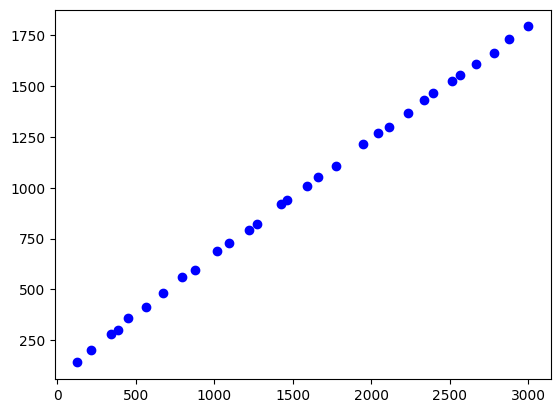

In [ ]:
plt.scatter(X, y, color='b')
plt.show()

In [ ]:
def scale(x):
    x = (x - min(x))/(max(x) - min(x))
    return x

In [ ]:
X_scale = scale(X)

In [ ]:
X_scale

array([0.        , 0.0295961 , 0.07451253, 0.08983287, 0.11316156,
       0.15181058, 0.19011142, 0.23293872, 0.26114206, 0.30884401,
       0.33635097, 0.38057103, 0.3979805 , 0.45264624, 0.46587744,
       0.5097493 , 0.53342618, 0.5724234 , 0.63266017, 0.66747911,
       0.69150418, 0.73328691, 0.76880223, 0.78760446, 0.83112813,
       0.84784123, 0.88440111, 0.92339833, 0.95612813, 1.        ])

In [ ]:
def hyp(X, a, b ,c):
    return a * X + b * (X) ** 0.5 + c

def cost_function(X, y, a, b, c):
    m = X.shape[0]
    error = hyp(X, a, b, c) - y
    J = np.sum(error**2)
    return J/(2*m)

def grad_a(X, y, a, b, c):
    m = X.shape[0]
    da = 0
    for i in range(m):
        error = hyp(X[i], a, b, c) - y[i]
        da += error * X[i]
    da /= m
    return da

def grad_b(X, y, a, b, c):
    m = X.shape[0]
    db = 0
    for i in range(m):
        error = hyp(X[i], a, b, c) - y[i]
        db += error * (X[i])**0.5
    db /= m
    return db

def grad_c(X, y, a, b, c):
    m = X.shape[0]
    dc = 0
    for i in range(m):
        error = hyp(X[i], a, b, c) - y[i]
        dc += error
    dc /= m
    return dc

In [ ]:
lr = 0.5
a, b, c = 0, 0, 0
cost = []
for i in range(10001):
    cost_value = cost_function(X_scale, y, a, b, c)
    cost.append(cost_value)

    ga = grad_a(X_scale, y, a, b, c)
    gb = grad_b(X_scale, y, a, b, c)
    gc = grad_c(X_scale, y, a, b, c)

    a = a - lr * ga
    b = b - lr * gb
    c = c - lr * gc

    if i%1000 == 0:
        print(f'At iteration {i}, cost : {cost_value}')

print(f'\na = {a}, b = {b}, c = {c}')

At iteration 0, cost : 599921.686
At iteration 1000, cost : 115.02983892547167
At iteration 2000, cost : 28.84238233740746
At iteration 3000, cost : 19.1715751436151
At iteration 4000, cost : 18.086446106492044
At iteration 5000, cost : 17.964687394565242
At iteration 6000, cost : 17.95102525538831
At iteration 7000, cost : 17.949492272294826
At iteration 8000, cost : 17.949320261371952
At iteration 9000, cost : 17.94930096059968
At iteration 10000, cost : 17.949298794924434

a = 1523.7333588317258, b = 139.98156411718836, c = 133.1336596250002


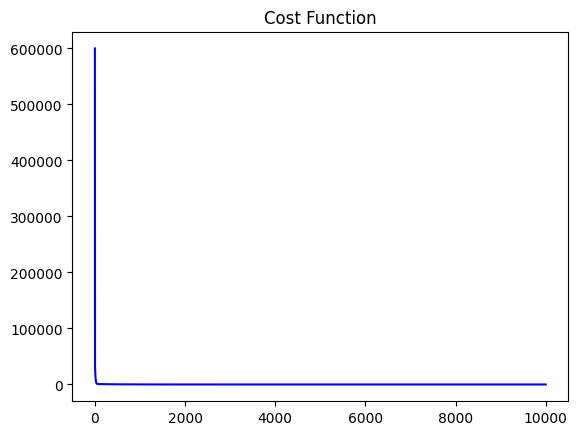

In [ ]:
plt.plot(range(10001), cost, color='b')
plt.title("Cost Function")
plt.show()

In [ ]:
y_pred = hyp(X_scale, a, b, c)
diff = pd.DataFrame({'Actual' : y, 'Predict' : y_pred, 'Difference' : abs(y-y_pred)})
diff

,Actual,Predict,Difference
0,140.9,133.133660,7.766340
1,200.3,202.311977,2.011977
2,280.4,284.881640,4.481640
3,298.8,311.970458,13.170458
4,358.2,352.650794,5.549206
5,414.3,418.993358,4.693358
6,484.2,483.847210,0.352790
7,561.4,555.630473,5.769527
8,593.7,602.577994,8.877994
9,690.9,681.522567,9.377433


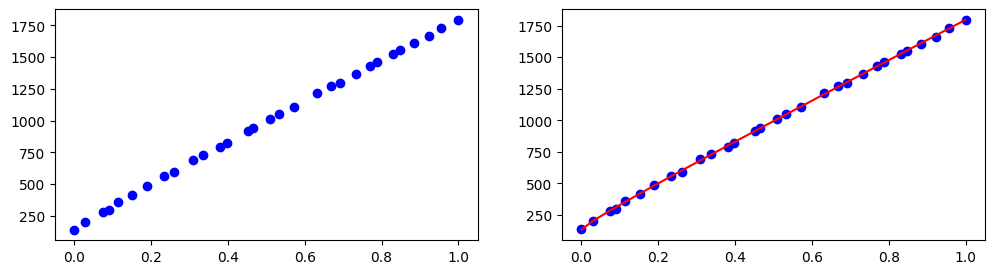

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

ax1.scatter(X_scale, y, color = 'b')

ax2.scatter(X_scale, y, color= 'b')
ax2.plot(X_scale, y_pred, color='r')


plt.show()